# CNN(합성곱 신경망)(Convolutional Neural Network)
: 주로 이미지 인식, 컴퓨터 비전 작업에서 사용된다.

- 이미지의 공간적, 패턴적 구조를 잘 파악하는 특징을 가지고 있다.

1) 합성곱 층(Convolutional Layer)
    - 필터(filter) : 입력 이미지의 작은 패치와 컨볼루션 연산을 수행하는 매개변수, 작은 크기의 행렬로 이미지 전체를 스캔하며 활성화 맵을 생성한다.
    - Stride : 필터가 입력 이미지를 이동하는 간격(클수록 출력 이미지가 작아진다.)
    - Padding : 입력 이미지 가장자리
2) 풀링 층(Pooling Layer)
    - Max Pooling : 주어진 영역 내에서 가장 큰 값을 선택하여 특징을 추출하고, 모델의 복잡도를 낮춘다.
    - Average Pooling : 평균 값을 계산하여 특징을 추출한다.
3) 완전연결 층(Fully Connected Layer) 마지막 단계
   
4) 활성화 함수(Activation Function)
 

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters = 32, kernel_size=3, activation='relu')(inputs) # 3*3(kernel_size)의 크기의 32개의 필터를 사용해서 이미지 특징을 추출한다. 
x = layers.MaxPooling2D(pool_size=2)(x) # 맥스풀링(최댓값 출력), 2*2의 크기릐 필터를 적용해서 크기를 줄인다.(공간 차원을 줄인다.) -> 과적합 방지
x = layers.Conv2D(filters = 64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From (original): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
From (redirected): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd&confirm=t&uuid=10042cd4-b537-467a-8fd7-f7fc4dff8621
To: /Users/jeon-yewon/Desktop/데이터 분석 강의/부트캠프/7주차/06.14./dogs-vs-cats.zip
  4%|█▌                                     | 35.1M/852M [00:04<01:32, 8.86MB/s]

KeyboardInterrupt: 

In [ ]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path('train') # 원본 데이터 셋 경로
new_base_dir = pathlib.Path('cats_vs_dogs_small') # 새로운 데이터 셋 경로

def make_subset(subset_name, start_index, end_index): # 폴더 이름과 범위를 전달받는다.
    for category in ('cat', 'dog'): # 고양이와 강아지 2번 작업
        dir = new_base_dir / subset_name / category # cats_vs_dogs_small / train / cat
        os.makedirs(dir) # 폴더 만들기
        fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)] # cat.1.jpg, cat.2.jpg ...
        for fname in fnames:
            shutil.copyfile(src = original_dir / fname, dst = dir / fname) # 이미지 파일 복사

make_subset('train', start_index = 0, end_index=1000)
make_subset('validation', start_index = 1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

In [11]:
inputs = keras.Input(shape = (180,180,3)) # 입력 이미지 180x180, RGB - 3
x = layers.Rescaling(1./255)(inputs) # 전처리 - 입력 데이터의 픽셀 값이 0과 1사이로 정규화하겠다.
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

In [12]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [13]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
# 이미지 불러오기
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(new_base_dir/'train', image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir/'validation', image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir/'test', image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [15]:
# 콜백함수 만들어서 학습시키기
callbacks = [keras.callbacks.ModelCheckpoint(filepath='convnet_from_scratch.h5', save_best_only = True, monitor='val_loss')]

history = model.fit(train_dataset, epochs = 30, validation_data = validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 82s 1s/step - loss: 0.8050 - accuracy: 0.5225 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/30


/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 74s 1s/step - loss: 0.7062 - accuracy: 0.5245 - val_loss: 0.7247 - val_accuracy: 0.5030
Epoch 3/30
63/63 [==============================] - 77s 1s/step - loss: 0.6904 - accuracy: 0.6105 - val_loss: 0.6527 - val_accuracy: 0.6230
Epoch 4/30
63/63 [==============================] - 74s 1s/step - loss: 0.6161 - accuracy: 0.6595 - val_loss: 0.9559 - val_accuracy: 0.5970
Epoch 5/30
63/63 [==============================] - 74s 1s/step - loss: 0.6066 - accuracy: 0.6765 - val_loss: 0.6125 - val_accuracy: 0.6580
Epoch 6/30
63/63 [==============================] - 74s 1s/step - loss: 0.5606 - accuracy: 0.7190 - val_loss: 0.5696 - val_accuracy: 0.6990
Epoch 7/30
63/63 [==============================] - 74s 1s/step - loss: 0.5395 - accuracy: 0.7445 - val_loss: 0.5186 - val_accuracy: 0.7290
Epoch 8/30
63/63 [==============================] - 75s 1s/step - loss: 0.4801 - accuracy: 0.7710 - val_loss: 0.5528 - val_accuracy: 0.7260
Epoch 9/30
63/63 [=============

In [7]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

  4%|█▋                                     | 35.7M/852M [00:20<01:32, 8.86MB/s]

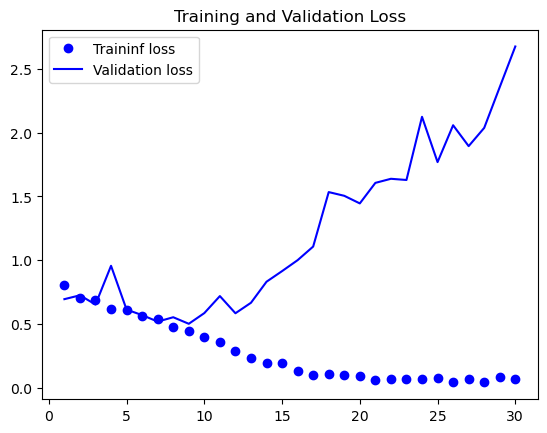

In [17]:
plt.plot(epochs, loss, 'bo', label='Traininf loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [18]:
test_model = keras.models.load_model('convnet_from_scratch.h5')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

63/63 [==============================] - 17s 267ms/step - loss: 0.5548 - accuracy: 0.7315
테스트 정확도 : 0.732


In [19]:
import numpy as np
import tensorflow as tf

random_numbers = np.random.normal(size=(1000, 16)) # 평균 0, 표준편차 1(정규화된 데이터) -> 1000개의 16차원 벡터 데이터 제작
dataset = tf.data.Dataset.from_tensor_slices(random_numbers) # 텐서플로 형식으로 변환

In [20]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 5 :
        break

(16,)
(16,)
(16,)
(16,)
(16,)
(16,)


In [21]:
batched_dataset = dataset.batch(32) # 배치 사이즈 32
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i > 5:
        break

(32, 16)
(32, 16)
(32, 16)
(32, 16)
(32, 16)
(32, 16)
(32, 16)


In [22]:
reshape_dataset = dataset.map(lambda x : tf.reshape(x, (4, 4)))

for i, element in enumerate(reshape_dataset):
    print(element.shape)
    if i > 5:
        break

(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)


In [23]:
for data_batch, labels_batch in train_dataset:
    print('데이터 배치 크기 : ', data_batch.shape)
    print('레이블 배치 크기 : ', labels_batch.shape)
    break

데이터 배치 크기 :  (32, 180, 180, 3)
레이블 배치 크기 :  (32,)


In [24]:
# 데이터를 학습할 때 결측치를 낮출 때 데이터를 더 넣어준다.
#  => 사진 데이터에선 데이터를 증식시켜버릴 수 있다.

# 데이터 증식
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

In [25]:
#### 오류해결 필요

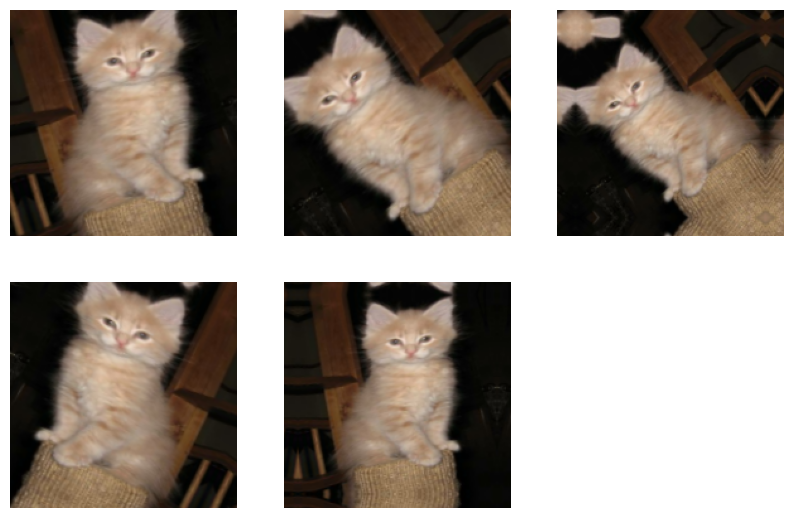

In [26]:
plt.figure(figsize=(10, 10))

for images, _ in train_dataset.take(1):
    for i in range(5): # 랜덤으로 가져온다.
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [27]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x) # 정규화 처리
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # 등호 추가

In [28]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath='convnet_from_scratch_with_augmentation.h5',
                                             save_best_only=True, monitor='val_loss')
            ]

history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)


Epoch 1/100
63/63 [==============================] - 66s 1s/step - loss: 0.7788 - accuracy: 0.4935 - val_loss: 0.6930 - val_accuracy: 0.4990
Epoch 2/100


/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 65s 1s/step - loss: 0.6980 - accuracy: 0.5205 - val_loss: 0.9880 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 65s 1s/step - loss: 0.6894 - accuracy: 0.5720 - val_loss: 0.6826 - val_accuracy: 0.5300
Epoch 4/100
63/63 [==============================] - 65s 1s/step - loss: 0.6699 - accuracy: 0.6115 - val_loss: 0.6598 - val_accuracy: 0.6230
Epoch 5/100
63/63 [==============================] - 65s 1s/step - loss: 0.6628 - accuracy: 0.6110 - val_loss: 0.6381 - val_accuracy: 0.6360
Epoch 6/100
63/63 [==============================] - 65s 1s/step - loss: 0.6521 - accuracy: 0.6360 - val_loss: 0.6238 - val_accuracy: 0.6560
Epoch 7/100
63/63 [==============================] - 70s 1s/step - loss: 0.6392 - accuracy: 0.6650 - val_loss: 0.7262 - val_accuracy: 0.5890
Epoch 8/100
63/63 [==============================] - 64s 1s/step - loss: 0.6260 - accuracy: 0.6650 - val_loss: 0.6089 - val_accuracy: 0.6740
Epoch 9/100
63/63 [======

KeyboardInterrupt: 

In [ ]:
test_model = keras.models.load_model('convnet_from_scratch_with_augmentation.h5')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}')

# VGG16
: 이미지 분류 모델 중 하나로 CNN 구조를 사용하는 모델이다.

- 합성곱 레이어
1) 총 13개의 합성곱 레이어로 구성되어 있다.
2) 작은 크기의 필터를 사용하여 특징을 추출한다.(3*3)
3) 필터 수가 점점 증가하여 특징을 깊이있게 학습할 수 있다. (32 -> 64 -> 128 -> 256 -> 512 ...)
4) 합성곱 연산을 통해 이미지에서 로컬 특징을 추출한다.

- 풀링 레이어 : 최대 풀링(Max Pooling) 레이어를 사용하여 특징 맵의 크기를 줄인다. 매개변수의 개수를 감소시키고, 특징에 대한 불변성을 높일 수 있다.

- 패딩 : 입력 이미지의 크기를 유지하기 위해 합성곱 연산 시 패딩을 사용한다. 연산 후에도 feature map의 크기가 입력과 동일하게 유지된다.

- Stride : 대부분 합성곱 레이어에서 stride 크기를 1로 설정한다. feature map의 크기 변화가 거의 없다.(공간 정보를 유지할 수 있게 도와주는 역할을 한다.)

- 활성화 함수 : ReLU 함수를 사용하여 비선형을 도입한다.

In [2]:
# 사전 훈련된 모델 VGG16 사용
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
)

NameError: name 'keras' is not defined

In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [1]:
def get_features_and_labels(dataset): # 이미지와 레이블이 포함된 데이터셋을 전달받고
    all_features = []
    all_labels = [] # 비어있는 칸 두 개 생성(특징(레이블) 입력)
    for images, labels in dataset: # 반복문, 이미지와 레이블들 하나씩 꺼내서 사용
        preprocessed_images = keras.applications.vgg16.preprocess_input(images) # 기존에 존재하는 keras에 존재하는 vgg16을 사용하여 전처리 실행
        # 전처리된 이미지를 통해 특징 추출
        features = conv_base.predict(preprocessed_images) # 특징 추출
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels) # Numpy 배열 형태로 반환

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)


NameError: name 'train_dataset' is not defined

In [ ]:
train_features.shape # 2000개의 이미지, 5*5의 feature map을 512개 가지고 있다.

In [ ]:
# VGG16에서 추출된 특징을 사용해서 이진 분류 모델 학습 처리
inputs = keras.Input(shape=(5, 5, 512)) # 5*5의 512개 shape으로 설정
x = layers.Flatten()(inputs) # 해당 input의 차원 낮추기
x = layers.Dense(256)(x) # 256개의 노드 개수를 가진 Dense 레이어에서 위 부분 처리
x = layers.Dropout(0.5)(x) # dropout을 통해 과적합 방지
outputs = layers.Dense(1, activation='sigmoid')(x) # 하나의 값으로 처리
model = keras.Model(inputs, outputs) # 위 전달된 것 따라 모델 처리
model.compile((loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # 바이너리, 콜백 등 똑같이 설정

callbacks = [keras.callbacks.ModelCheckpoint(filepath='feature_extraction.h5', save_best_only=Ture, monitor='val_lodd')]

history = model.fit(train_features, train_labels, epochs=20, validation_data = (val_features, val_labels), callbacks=callbacks)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# 손실 그래프 그리기
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model('feature_extraction.h5')
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f'테스트 정확도 : {test_acc:.3f}')

In [ ]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False) # top 레이어(완전 연결 레이어) 제외

conv_base.trainable = False # 가중치 고정 

In [ ]:
conv_base.trainable = True

print('합성곱 기반 층을 가중치 고정하기 전의 훈련 가능한 가중치 개수 : ', len(conv_base.trainable_weights))

In [ ]:
conv_base.trainble = False

print('합성곱 기반 층을 가중치 고정하기 전의 훈련 가능한 가중치 개수 : ', len(conv_base.trainable_weights))

## 가중치 고정 이유

- 대규모 데이터 셋에서 학습된 모델은 일반적으로 강력한 특징 추출 능력을 가지고 있다.(더이상 학습할 필요가 없다.)
- 데이터 셋이 작은 경우 사전학습 모델의 가중치를 고정하면 과적합을 방지할 수 있다.
- 학습 속도가 빠르고, 메모리 사용량이 줄어든다.

In [ ]:
data_augmentation # 데이터 증식

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath='feature_extraction_with_data_augmentation.h5',
                                             save_best_only=True,
                                             monitor='val_loss')
            ]

history = model.fit(train_features, epochs=50, validation_data = validation_dataset, callbacks=callbacks) 

In [ ]:
# 숙제1
# 위 코드 결과로 정확도, 손실 그래프 그리기
import matplotlib.pyplot as plt
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# 학습 결과 정확도 체크
def print_test_results(model, test_features, test_labels):
    test_loss, test_acc = model.evaluate(test_features, test_labels)
    print(f"Test accuracy: {test_acc}")
    print(f"Test loss: {test_loss}")

# 06.17.

### 테스트 정확도 올리기

In [ ]:
# 마지막에서 네번째 층까지 가중치 고정
from tensorflow import keras
from tensorflow.keras import layers
import gdown
import zipfile
import os, shutil, pathlib


conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'fine_tuning.h5',
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(
    trian_dataset,
    epochs=30,
    validation_data = validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model('fine_tuning.h5')
test_loss, test_acc = model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc.3f}')